In [21]:
from keras.datasets import cifar100

In [22]:
(x_train,y_train),(x_test,y_test) = cifar100.load_data()
X=x_test
Y=y_test

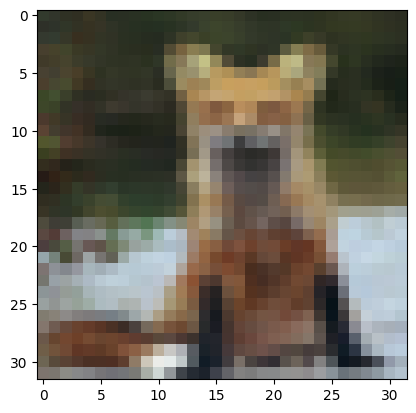

Số này là: [34]


In [23]:
import matplotlib.pyplot as plt
things = x_train[35278]
plt.imshow(things, cmap = plt.cm.binary)
plt.show()
print('Số này là:',y_train[35278])

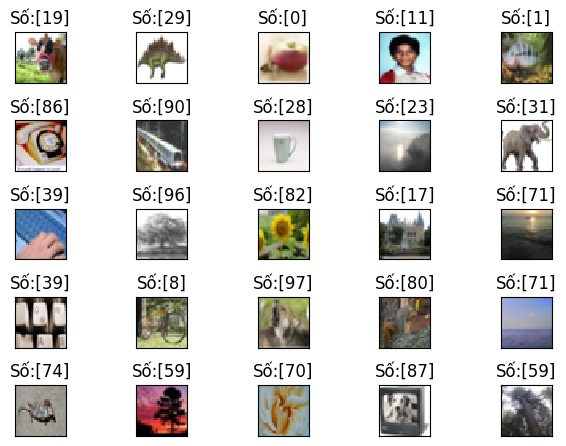

In [24]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',
             interpolation='none')
  plt.title('Số:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [25]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(512,activation = 'relu', input_shape = (3072,)))
model.add(Dense(100,activation = 'softmax'))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 100)               51300     
                                                                 
Total params: 1,624,676
Trainable params: 1,624,676
Non-trainable params: 0
_________________________________________________________________


In [27]:
x_train = x_train.reshape(50000,32*32*3)
x_train = x_train.astype('float32')/255

In [28]:
x_test = x_test.reshape(10000,32*32*3)
x_test = x_test.astype('float32')/255

In [29]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)

In [30]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [31]:
model.fit(x_train,y_train,epochs=100,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Mất mát:',test_loss)
print('Độ chính xác:',test_acc)

Epoch 1/100
391/391 [==============================] - 15s 37ms/step - loss: 4.2639 - accuracy: 0.0660
Epoch 2/100
391/391 [==============================] - 12s 32ms/step - loss: 3.8186 - accuracy: 0.1211
Epoch 3/100
391/391 [==============================] - 12s 32ms/step - loss: 3.6673 - accuracy: 0.1492
Epoch 4/100
391/391 [==============================] - 12s 32ms/step - loss: 3.5763 - accuracy: 0.1656
Epoch 5/100
391/391 [==============================] - 12s 32ms/step - loss: 3.5080 - accuracy: 0.1800
Epoch 6/100
391/391 [==============================] - 12s 32ms/step - loss: 3.4593 - accuracy: 0.1880
Epoch 7/100
391/391 [==============================] - 12s 32ms/step - loss: 3.4151 - accuracy: 0.1949
Epoch 8/100
391/391 [==============================] - 12s 32ms/step - loss: 3.3804 - accuracy: 0.2021
Epoch 9/100
391/391 [==============================] - 12s 32ms/step - loss: 3.3444 - accuracy: 0.2093
Epoch 10/100
391/391 [==============================] - 12s 32ms/step - l

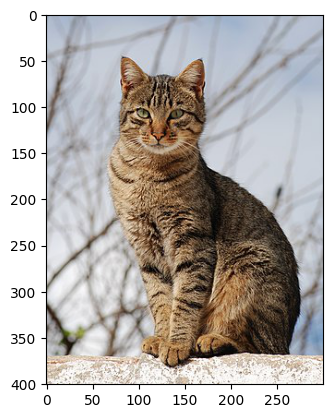

In [32]:
img = plt.imread('meo_sample.jpg')
plt.imshow(img)
plt.show()

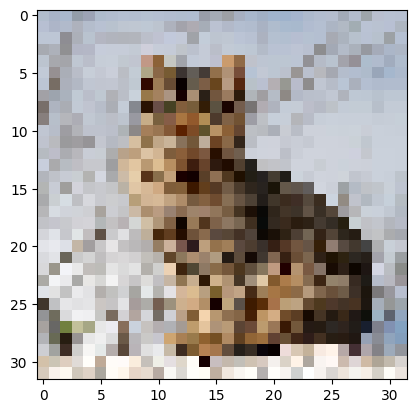

In [33]:
from keras.utils import load_img, img_to_array
img = load_img('meo_sample.jpg',target_size=(32,32))
plt.imshow(img)

In [34]:
import numpy as np
img = img_to_array(img)
img=img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 94ms/step


array([3])